# **TUGAS 3**

Materi:
- Clustering
- Linear Independence

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## **Customer Segmentation Strategy**
---
- Anda adalah seorang pemilik mall besar. 
- Anda memiliki beberapa data customer seperti:
   - customer ID
   - age (umur)
   - gender (jenis kelamin)
   - annual income (pemasukan tahunan)
   - Spending score (skor untuk tingkat/perilaku pembelian. Semakin besar artinya perilaku membelinya semakin sering)

- Anda ingin membantu tim marketing untuk membuat strategi.
- Karena Anda seorang data-scientist juga, Anda terpikir dapat memberikan segementasi dari customer untuk memberikan sense kepada tim marketing dalam membuat strategi.

Load Dataset

In [2]:
#Import the dataset
customer_df = pd.read_csv('dataset/data_linalg_tugas03/Mall_Customers.csv')
customer_df.head(10) #Printing first 10 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


---

- Untuk membentuk segmentasi, Anda dapat menganalogikannya dengan metode clustering.
- Lengkapi fungsi berikut untuk melakukan clustering

---
**Soal 5**

- Lengkapi fungsi mencari jarak ke setiap centroid

In [3]:
# Group Assignment
def group_assignment(points, centroids):
    """
      input:
          points    : list titik
          centroids : list centroid

      output:
          c         : vektor member centroids
    """
    N = len(points)
    k = len(centroids)

    c = np.zeros(N)

    for i in range(N):
        list_distance = np.zeros(k)

        for j in range(k):
            dist_ = np.linalg.norm(points[i] - centroids[j])
            list_distance[j] = dist_

        c[i] = np.argmin(list_distance) + 1
    return c

**Soal 6**

- Lengkapi fungsi mencari jumlah poin pada centroid baru
- Lengkapi fungsi untuk mencari centroid yang baru

In [4]:
# Update Centroid
def update_centroid(points, c, centroids):
    """
      Input:
          points    : list titik
          c         : vektor member centroids
          centroids : list centroid
      
      output:
          list_new_centroids   : list centroid baru
    """
    N = len(points)
    k = len(centroids)

    list_new_centroids = np.zeros((k, 2))

    for j in range(k):
        points_in_cluster = points[c-1 == j]

        new_centroid = np.mean(points_in_cluster, axis=0)

        list_new_centroids[j] = new_centroid

    return list_new_centroids

**Soal 7**

- Lengkapi fungsi untuk mencari $J_{obj}$ 
- Lengkapi fungsi untuk mencari rata-rata dari $J_{obj}$ 

In [5]:
# Clustering Objective
def clustering_objective(points, c, centroids):
    """
      Input:
          points    : list titik
          c         : vektor member centroids
          centroids : list centroid

      Output:
          J_obj     : J obj (J cluster)
    """
    N = len(points)
    k = len(centroids)

    J_obj = 0

    for i in range(N):
        for j in range(k):
            if c[i] == j+1:
                dist_ = np.linalg.norm(points[i] -  centroids[j])**2
                J_obj += dist_

    J_obj = (1/N) * J_obj
    return J_obj

**Soal 8**

- Lengkapi algoritma K-Means berikut

In [6]:
# K-means algorithm
def kMeans_algorithm(points, centroids, epsilon=1e-6):
    """
      Input:
        points    : list titik
        centroids : list centroid
        epsilon   : batasan maksimum perubahan centroid

      Output:
        new_centroids : list centroid final
        c             : vektor member centroids final
        iteration     : jumlah iterasi yang disimpan
    """
    iteration = 0
    J_obj_list = []
    stop_iteration = False

    while stop_iteration == False:
      # 1. cari alamat centroid untuk setiap titik -> c
      c = group_assignment(points, centroids)

      # 2. update representasi centroid -> new_centroid
      new_centroids = update_centroid(points, c, centroids)

      # 3. clustering objective
      J_obj = clustering_objective(points, c, centroids)

      # 4. simpan J_obj ke dalam J_obj_list
      J_obj_list.append(J_obj)
      iteration += 1

      # stopping criteria
      if np.linalg.norm(centroids - new_centroids) < epsilon:
        stop_iteration = True
      else:
        centroids = new_centroids
        
    return new_centroids, c, J_obj_list, iteration

---
**Soal Bonus**
- Sekarang Anda telah siap untuk melakukan Clustering
- Kira-kira apa yang Anda lakukan setelah ini untuk mendukung langkah selanjutnya?

In [ ]:
# Jawab disini

# langkah selanjutnya
langkah_selanjutnya = """
- tulis dalam bentuk poin
- tulis dalam bentuk poin
- tulis dalam bentuk poin
"""

# tulis code dari jawaban di atas
...

**Soal 9**

- Menurut Anda, data ini memiliki berapa segementasi customer (cluster)?

In [9]:
# Jumlah cluster
n_cluster = 5

# Centroid
# Definisikan centroids dari tiap cluster
centroids = np.array([[25, 20],
                      [25, 80],
                      [45, 45],
                      [110, 20],
                      [100, 80]])

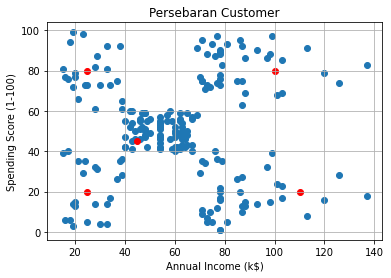

In [10]:
# Jalankan Code ini untuk visualisasi centroids
plt.scatter(customer_df['Annual Income (k$)'], customer_df['Spending Score (1-100)'])
plt.scatter(centroids[:,0], centroids[:,1], c='r')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Persebaran Customer')
plt.grid()
plt.show()

**Soal 10**

- Lakukan clustering mengikuti jumlah cluster yang Anda tentukan

In [12]:
# Data Input [Annual Income, Spending Score]
data_input = customer_df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

# Jalankan kMeans_algorithm
centroids, c, J_obj_list, iteration = kMeans_algorithm(data_input, centroids, epsilon=1e-6)

Jalankan code berikut untuk menampilkan hasil segementasi customer (centroid dari cluster)

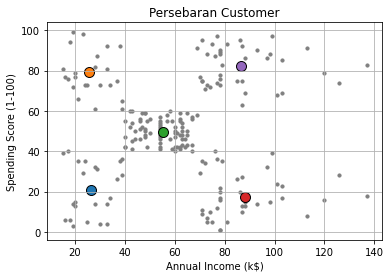

In [13]:
# Plot Customer data
plt.scatter(customer_df['Annual Income (k$)'], customer_df['Spending Score (1-100)'], c='grey', s=10, label='point')

# Plot centroids
for i in range(n_cluster):
    plt.scatter(centroids[i,0], centroids[i,1], edgecolor='k', s=100, label=f'centroid {i}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Persebaran Customer')
plt.grid()
plt.show()

**Soal Bonus**

- Interpretasikan hasil segmentasi customer (clustering) yang telah dibuat
- Hal ini sangat bermanfaat untuk tim Marketing

In [ ]:
interpretasi = """
- Tulis dalam point per point
- Tulis dalam point per point
"""